### Linear Regression from Scratch!

In [1]:
# Our cost function
def cost_function(m, b, x, y):
  totalError = 0
  for i in range(0, len(x)):
    totalError += (y[i]-(m*x[i]+b))**2
  return totalError/float(len(x))

In [2]:
# Implementation of the gradient descent algorithm
def gradient_descent(b, m, x, y, learning_rate, num_iterations):
  N = float(len(x))
  # repeat for num_iterations
  for j in range(num_iterations):
    b_gradient = 0
    m_gradient = 0
    for i in range(0, len(x)):
      b_gradient += -(2/N) * (y[i] - ((m * x[i]) + b))
      m_gradient += -(2/N) * x[i] * (y[i] - ((m * x[i]) + b))
    b -= (learning_rate * b_gradient)
    m -= (learning_rate * m_gradient)
  # Every 100 iterations we print our error
  if j%100==0:
    print("MSE after " + str(j) + " iterations: " + str(cost_function(m, b, x, y)))
  return [b, m]

Let's test our Linear Regression algorithm on some test data

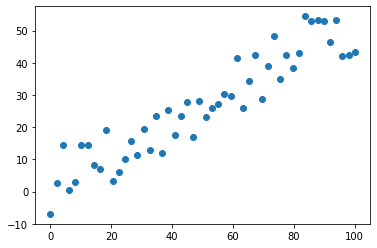

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# Let's create a some randon data using linspace
x = np.linspace(0, 100, 50) 
# creates a range of 50 numbers evenly spaced between 0 and
delta = np.random.uniform(-10, 10, x.size)
y = 0.5*x + 3 + delta
plt.scatter(x, y)

In [4]:
# Defining our learning rate
learning_rate = 0.0001
# defining our initial values of b and m
initial_b = 0
initial_m = 0
# Setting how many iterations we wish to run
num_iterations= 1000
print('Initial MSE:', cost_function(initial_m, initial_b, x, y))
[b, m] = gradient_descent(initial_b, initial_m, x, y, learning_rate, num_iterations)
print('b:', b)
print('m:', m)
print('MSE:', cost_function(m, b, x, y))

Initial MSE: 965.5622471100492
b: 0.052117843512482935
m: 0.5251945406364275
MSE: 33.99022714501742


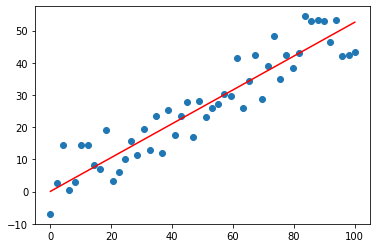

In [5]:
predictions = [(m * x[i]) + b for i in range(len(x))]
plt.scatter(x, y)
plt.plot(x, predictions, color='r')

Let's use Sk Learn's Linear Regression model

In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression
# Let's change the shape of x array to the format expected by sklearn
print(x.shape)
x = x.reshape((-1, 1))
print(x.shape)

(50,)
(50, 1)


In [7]:
# Let's create the model object using LinearRegression
model = LinearRegression()
# Fit our model to our input data x and y
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# Get our model paramters
print('Y Intercept:', model.intercept_) #b
print('Gradient:', model.coef_) #m

Y Intercept: 0.8904394128237847
Gradient: [0.51274578]


In [9]:
print('Y Intercept:', b)
print('Gradient:', m)

Y Intercept: 0.052117843512482935
Gradient: 0.5251945406364275


In [10]:
# Store all predictions in y_pred
y_pred = model.predict(x)

In [11]:
y

array([-6.95557722,  2.73006738, 14.50905423,  0.51868566,  2.89754136,
       14.34678752, 14.39674249,  8.0837905 ,  6.95270343, 19.22409464,
        3.23916458,  6.05727937, 10.01380264, 15.77732446, 11.35763897,
       19.29170862, 12.74563785, 23.5971033 , 11.81206682, 25.17966622,
       17.65359694, 23.50217896, 27.8543086 , 17.03691738, 28.0210583 ,
       23.20625984, 25.97278027, 27.22348174, 30.14148301, 29.65969821,
       41.32788299, 26.06878364, 34.25504546, 42.37007355, 28.78699386,
       38.91888933, 48.16413169, 34.9866087 , 42.39871793, 38.50980219,
       43.12425172, 54.42956365, 52.86525358, 53.24713731, 53.08917143,
       46.44848926, 53.25442286, 42.09279628, 42.54350496, 43.45786293])

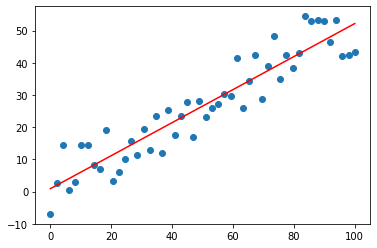

In [12]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='r')

In [13]:
from sklearn.metrics import mean_squared_error
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))

Mean squared error: 33.81


## Linear Regression on Olympic 100m Gold Times

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
file_name = "/content/olympic100m.csv"
df = pd.read_csv(file_name)
df.head(40)

,year,time
0,1896,12.00
1,1900,11.00
2,1904,11.00
3,1906,11.20
4,1908,10.80
5,1912,10.80
6,1920,10.80
7,1924,10.60
8,1928,10.80
9,1932,10.30


In [15]:
# Format data into correct shape
x = df['year']
x_train = np.array(x).reshape((-1, 1))
x_train.shape

(29, 1)

In [16]:
y_train = np.array(df['time'])

In [17]:
y_train.shape

(29,)

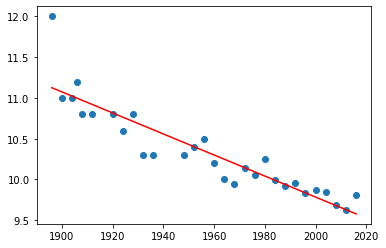

In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression
# Let's create the model object using LinearRegression
model = LinearRegression()
# Fit our model to our input data x and y
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
plt.scatter(x_train, y_train)
plt.plot(x, y_pred, color='r')

In [19]:
# Predict for 2020 Olympics
x_2020 = np.array([2020]).reshape(-1, 1)
x_2020.shape

(1, 1)

In [20]:
model.predict(x_2020)

array([9.52679525])

## Polynomial Regressions

In [21]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Importing the dataset
file_name = "/content/polylinearregression.csv"
df = pd.read_csv(file_name)
df.head(7)

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [22]:
# Extract our x values, the column Temperature
x = df.iloc[:, 1:2].values
# Extract our y or target variable Pressure
y = df.iloc[:, 2].values

In [23]:
x


array([[  0],
       [ 20],
       [ 40],
       [ 60],
       [ 80],
       [100]])

In [24]:
# Fitting Polynomial Regression to the dataset
# Fitting the Polynomial Regression model on two components X and y.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 9)
model_Poly = poly.fit_transform(x)
lin_poly = LinearRegression()
lin_poly.fit(model_Poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

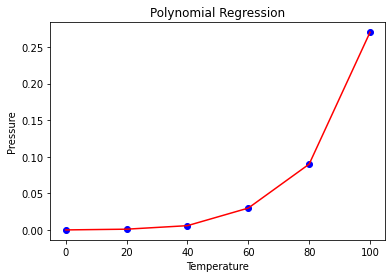

In [25]:
# Visualising the Polynomial Regression results
plt.scatter(x, y, color = 'blue')
plt.plot(x, lin_poly.predict(model_Poly), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.show()

## Multivariate Linear Regression

In [26]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Importing the dataset
file_name = "/content/autompg.csv"
auto_df = pd.read_csv(file_name)
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [27]:
# Check for the rows that contain "?"
auto_df[auto_df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
123,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
327,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
333,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
351,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
371,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [28]:
# Get the indexes that have "?" instead of numbers
indexNames = auto_df[auto_df['horsepower'] == "?" ].index
# Delete these row indexes from dataFrame
auto_df.drop(indexNames , inplace=True)

In [29]:
# Just checking to see if they've been removed
auto_df[auto_df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


In [30]:
auto_df['horsepower'] = auto_df['horsepower'].astype(float)

In [31]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           389 non-null    float64
 1   cylinders     389 non-null    int64  
 2   displacement  389 non-null    float64
 3   horsepower    389 non-null    float64
 4   weight        389 non-null    int64  
 5   acceleration  389 non-null    float64
 6   model year    389 non-null    int64  
 7   origin        389 non-null    int64  
 8   car name      389 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.4+ KB


In [32]:
x = auto_df.iloc[:,1:8].values
y = auto_df.iloc[:,0].values

In [33]:
x.shape

(389, 7)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state=0)
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
# cylinders displacement horsepower weight acceleration model year origin
# Data for Honda Prelude actual mpg is 24
Trial_Data = np.array([8, 220, 195, 3042 , 6.7, 98, 3])
Trial_Data = Trial_Data.reshape((-1, 7))
Trial_Data = Trial_Data.astype(float)

In [36]:
regressor.predict(Trial_Data)[0]

38.18699460555594